# Study friend information

This notebook looks at the players friend information. Distinct because it goes up the tree.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [28]:
df = pd.read_csv("player_friend_info_200k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

In [29]:
df = df[pd.to_datetime(df['friend_since'], unit='s') < churn_cutoff]

In [30]:
df.head()

,friend_since,relationship,steamid,steamid_orig
0,1434524498,friend,76561198007070703,76561198199710782
1,1437740667,friend,76561198041503217,76561198199710782
2,1438264541,friend,76561198238259518,76561198199710782
3,1421677696,friend,76561197960448312,76561198049785932
4,1490267324,friend,76561197961426758,76561198049785932


In [31]:
df.tail()

,friend_since,relationship,steamid,steamid_orig
23957903,1439112895,friend,76561198240184600,76561198084135026
23957904,1465741880,friend,76561198256885545,76561198084135026
23957905,1449753326,friend,76561198267277378,76561198084135026
23957906,1462262043,friend,76561198273192861,76561198084135026
23957907,1492759425,friend,76561198322866773,76561198084135026


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22928655 entries, 0 to 23957907
Data columns (total 4 columns):
friend_since    int64
relationship    object
steamid         object
steamid_orig    int64
dtypes: int64(2), object(2)
memory usage: 874.7+ MB


In [33]:
df['steamid'].nunique()

9837216

In [34]:
df['steamid_orig'].nunique()

170877

In [35]:
df['relationship'].nunique()

1

In [36]:
df = df.drop('relationship',axis='columns')

In [37]:
#df['Root'] = (df['steamid_orig'] == 76561197960434622)

In [38]:
#df[df['Root']].head()

In [39]:
#df[~df['Root']].head()

In [40]:
#First_tier = list(df[df['Root']]['steamid'])

In [41]:
#df['First_tier'] = df['steamid_orig'].apply(lambda x: x in First_tier)

In [42]:
#Second_tier = list(df[df['First_tier']]['steamid'])

In [43]:
#df['Second_tier'] = df['steamid_orig'].apply(lambda x: x in Second_tier)

In [44]:
#Third_tier = list(df[df['Second_tier']]['steamid'])

In [45]:
#df['Third_tier'] = df['steamid_orig'].apply(lambda x: x in Third_tier)

In [46]:
#len(df[(~df['Second_tier']) & (~df['First_tier'])& (~df['Third_tier'])])

In [47]:
#len(df[df['First_tier'] == True])

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Now count friends other direction

In [50]:
df_num_Friends = (df.groupby('steamid').count()['steamid_orig']).to_frame()

In [51]:
df_num_Friends = df_num_Friends.reset_index()

In [52]:
df_num_Friends.head()

,steamid,steamid_orig
0,76561197960265729,2
1,76561197960265730,7
2,76561197960265731,83
3,76561197960265733,44
4,76561197960265737,3


In [53]:
df_num_Friends['num_Friends_up'] = df_num_Friends['steamid_orig']

In [54]:
df_num_Friends.head()

,steamid,steamid_orig,num_Friends_up
0,76561197960265729,2,2
1,76561197960265730,7,7
2,76561197960265731,83,83
3,76561197960265733,44,44
4,76561197960265737,3,3


In [55]:
df_num_Friends = df_num_Friends.drop('steamid_orig',axis='columns')

In [56]:
df_num_Friends.head()

,steamid,num_Friends_up
0,76561197960265729,2
1,76561197960265730,7
2,76561197960265731,83
3,76561197960265733,44
4,76561197960265737,3


In [57]:
df_num_Friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837216 entries, 0 to 9837215
Data columns (total 2 columns):
steamid           object
num_Friends_up    int64
dtypes: int64(1), object(1)
memory usage: 150.1+ MB


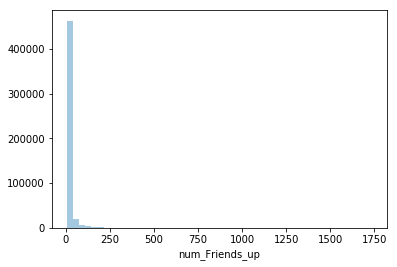

In [58]:
sns.distplot(df_num_Friends[df_num_Friends['num_Friends_up'] > 5]['num_Friends_up'],kde=False)

In [59]:
df_num_Friends.to_csv('200k_friend_num_up.csv')